# ANALISIS DATA PEMBOKINGAN HOTEL
![title](FIND_IT_2020.png)
### source : FIND IT 2020 DATA ANALYST

#### oleh :
    Elvin Nur Furqon (Telkom University)
    Sebastian Cahyo Ardhi Iswara (Telkom University)

## LIBRARY

Module library yang akan digunakan Modul yang digunakan sebagai berikut :
- Pandas
- matplotlib
- Seaborn
- Numpy
- sklearn (scikit-lean)

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# FUNGSI

fungsi yang akan digunakan sebagai berikut:
* ECDF

In [5]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1) / n
    return x, y

def n_neighborsChecking(X_train, X_test, y_train, y_test):
    n_neigbors = enumerate(range(9), start=0)
    train_accuracy = np.empty( len(n_neigbors) )
    test_accuracy =np.empty( len(n_neighbors) )
    
    for i,j in enumerate(n_neigbors):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train,y_train)
        test_accuracy[i] = knn.score(X_test,y_test)
    
    plt.title("knn : variasi dari neighbors")
    plt.plot(n_neigbors,train_accuracy * 100,label='Training akurasi')
    plt.plot(n_neigbors,test_accuracy * 100,label='Testing akurasi')
    plt.legend()
    plt.xlabel("nilai n_neighbors")
    plt.ylabel("nilai akurasi ")
    plt.show()

        

## LOAD DATA FILE

load file 'hotel_bookings.csv' dengan colomn reservaton_status_date sebagai index

In [6]:
df = pd.read_csv('hotel_bookings.csv',parse_dates=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# EDA (Exploratory data analysis)

explorasi informasi-informasi atau kesimpualan yang terkait dengan data ini.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

jadi pada data tersebut diperoleh informasi sebagai berikut.
* total data 119.390 dengan total 31 column
* memory yang digunakan kurang lebih 29.1 MB
* data yang kosong berapa pada column children, country dan company

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Perlu cleaning data untuk dapat summary yang tepat

###  1. Cleaning Data

membenahi data-data yang dapat menggangu pada pengambilan kesimpulan

In [9]:
df.hotel.astype('category')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df = df.set_index(['reservation_status_date']).sort_index()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2014-10-17,City Hotel,1,300,2015,August,33,13,0,2,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,...,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled


In [10]:
for column in df.columns:
    print(f'total unique value dari column "{column}"')
    print(df[column].value_counts())
    print()

total unique value dari column "hotel"
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

total unique value dari column "is_canceled"
0    75166
1    44224
Name: is_canceled, dtype: int64

total unique value dari column "lead_time"
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

total unique value dari column "arrival_date_year"
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

total unique value dari column "arrival_date_month"
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

total unique value dari column "arrival_date_week_number"
33    3580
30    3087
32    3045
34    3040
18    2926
21    

In [11]:
df.groupby('hotel')['is_canceled'].sum()

hotel
City Hotel      33102
Resort Hotel    11122
Name: is_canceled, dtype: int64

In [12]:
df_new = df.dropna(axis=1)
df_new['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [13]:
df_new['hotel'] = df_new['hotel'].astype('category')
df_new['arrival_date_month'] = df_new['arrival_date_month'].astype('category') 
df_new['meal'] = df_new['meal'].astype('category')
df_new['market_segment'] = df_new['market_segment'].astype('category')
df_new['distribution_channel'] = df_new['distribution_channel'].astype('category')
df_new['reserved_room_type'] = df_new['reserved_room_type'].astype('category')
df_new['assigned_room_type'] = df_new['assigned_room_type'].astype('category')
df_new['deposit_type'] = df_new['deposit_type'].astype('category')
df_new['customer_type'] = df_new['customer_type'].astype('category')
df_new['reservation_status'] = df_new['reservation_status'].astype('category')
df_new['is_canceled'] = df_new['is_canceled'].astype('category')

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119390 entries, 2014-10-17 to 2017-09-14
Data columns (total 27 columns):
hotel                             119390 non-null category
is_canceled                       119390 non-null category
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null category
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null category
market_segment                    119390 non-null category
distribution_channel              119390 non-null category
is_repeated_guest                 119390 non-null int64
previous_cancel

### 2. Visualisasi Data

representasi data-data untuk membantu dalam mendapatkan kesimplan yang tepat

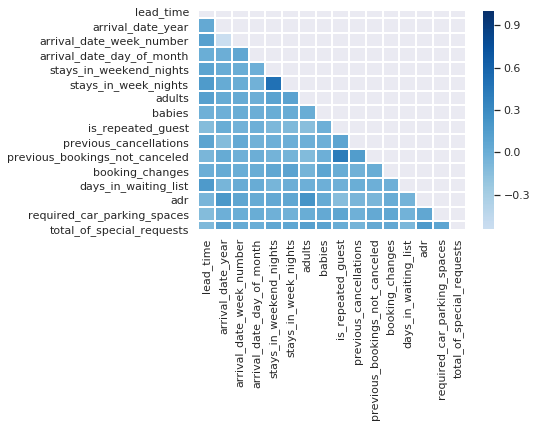

In [15]:
sns.set()
corr = df_new.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,center=0,linewidth=1,cmap='Blues')
plt.show()

berdasarkan hasil analisis data diatas, kami mencari korelasi antara feature yang ada guna mereduksi banyak feature yang akan digunakan dalam proses pembuatan model:

feature stay_in_week_nights dan stay_in_weekend_nights memiliki korelasi yang cukup tinggi, sehingga apabila kita membuang salah satunya informasi yang didapatkan tetap utuh

feature previous_booking_not_canceled dan is_repeated_guest juga memiliki korelasi yang cukup tinggi kedua setelah feature stay_in_week_nights.

Berdasarkan data-data yang diperoleh, maka kami menarik kesimpulan sebagai berikut:
* feature stay_in_week_nights akan di drop dikarenakan dapat digantikan dengan stay_in_weekend_nights, alasannya karena dalam reservasi pembokingan hotel, dalam kenyataanya adalah saat liburan(weekend) akan sangat berpengaruh dibandingkan dengan pembokingan biasa pada hari libur (sabtu/minggu)
* feature previous_booking_not_canceled akan di drop dikarenakan, jika is_repeated_guest / tamu yang sudah pernah menginap, kemungkinan besar tidak membatalkan sebelumnya.

In [16]:
df_new.reset_index()

,reservation_status_date,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,2014-10-17,City Hotel,1,300,2015,August,33,13,0,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,Canceled
1,2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,Canceled
2,2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,Canceled
3,2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,Canceled
4,2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,...,A,A,0,No Deposit,0,Transient-Party,62.80,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2017-09-10,Resort Hotel,0,169,2017,August,35,30,2,9,...,E,E,0,No Deposit,0,Transient-Party,204.27,0,1,Check-Out
119386,2017-09-10,Resort Hotel,0,269,2017,August,34,24,4,13,...,D,D,0,No Deposit,0,Contract,84.80,0,2,Check-Out
119387,2017-09-12,Resort Hotel,0,204,2017,August,35,29,4,10,...,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out
119388,2017-09-14,Resort Hotel,0,211,2017,August,35,31,4,10,...,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out


In [17]:
df_new.var()

lead_time                         11419.721511
arrival_date_year                     0.500522
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
booking_changes                       0.425503
days_in_waiting_list                309.574203
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119390 entries, 2014-10-17 to 2017-09-14
Data columns (total 27 columns):
hotel                             119390 non-null category
is_canceled                       119390 non-null category
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null category
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null category
market_segment                    119390 non-null category
distribution_channel              119390 non-null category
is_repeated_guest                 119390 non-null int64
previous_cancel

In [19]:
X,y = df_new.drop('is_canceled',axis=1) , df_new['is_canceled']

In [20]:
# from sklearn.preprocessing import StandardScaler
# stand = StandardScaler()
# stand.fit_transform(X)

# TRAIN MODEL

In [21]:
encoder = LabelEncoder()
X['hotel'] = encoder.fit_transform(df['hotel'])
X['arrival_date_month'] = encoder.fit_transform(df['hotel'])
X['meal'] = encoder.fit_transform(df['meal'])
X['market_segment'] = encoder.fit_transform(df['market_segment'])
X['distribution_channel'] = encoder.fit_transform(df['distribution_channel'])
X['reserved_room_type'] = encoder.fit_transform(df['reserved_room_type'])
X['assigned_room_type'] = encoder.fit_transform(df['assigned_room_type'])
X['deposit_type'] = encoder.fit_transform(df['deposit_type'])
X['customer_type'] = encoder.fit_transform(df['customer_type'])
X['reservation_status'] = encoder.fit_transform(df['reservation_status'])

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.4,random_state=46)

In [22]:
import timeit
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
%timeit knn.fit(X_train,y_train)
knn.score(X_test,y_test)


555 ms ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.7867074294329508

In [24]:
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestClassifier(),5,step=1,verbose=0)
rfe.fit(X,y)
mask = rfe.support_
X_new = X.loc[:,mask]
print(X_new.columns)

Index(['lead_time', 'previous_cancellations', 'deposit_type',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')


In [25]:
X_new['deposit_type'].value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

In [26]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,max_features=26)
%timeit rf.fit(X_train,y_train)
knn.score(X_test,y_test)


311 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.7867074294329508

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,stratify=y,test_size=0.4,random_state=46)

rf = RandomForestClassifier(n_jobs=-1,max_features=5)
%timeit rf.fit(X_train,y_train)
acc = rf.score(X_test,y_test)

print(f'Akurasi model prediksi pembatalan booking hotel sebesar\t:  {acc*100}%')


117 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Akurasi model prediksi pembatalan booking hotel sebesar	:  100.0%
